# PCA
Applichiamo la PCA sia al dataset degli stock returns che a quello di SPY. Vedremo come applicarlo sui ritorni di S&P alla fine.

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv("sp500_closefull.csv", index_col="Date", parse_dates=True)

In [4]:
df.head()

,CSCO,UAL,TROW,ISRG,PRGO,TPR,DVN,MRO,BA,VRTX,...,M,CRM,PGR,WAT,BWA,LRCX,NWL,UAA,BLK,PPL
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,24.690001,12.80,54.400002,102.923332,40.349998,36.310001,76.570000,19.153616,56.180000,44.240002,...,17.059999,18.705000,18.030001,61.630001,16.889999,39.880001,15.20,3.51000,238.580002,30.242558
2010-01-05,24.580000,13.91,55.009998,102.459999,38.790001,36.750000,76.650002,19.171511,58.020000,42.779999,...,16.860001,18.625000,17.969999,60.790001,17.695000,39.610001,15.11,3.61500,239.610001,29.851370
2010-01-06,24.420000,13.27,54.150002,103.946663,38.299999,37.470001,76.419998,19.595024,59.779999,42.029999,...,17.100000,18.592501,17.790001,60.900002,18.344999,39.430000,15.38,3.69500,234.669998,29.916569
2010-01-07,24.530001,13.55,54.110001,103.556664,37.990002,37.490002,75.970001,19.475725,62.200001,41.500000,...,17.490000,18.510000,17.549999,61.160000,18.594999,39.360001,15.82,3.65125,237.250000,29.627834
2010-01-08,24.660000,13.33,53.900002,102.986664,37.779999,37.270000,76.120003,19.505550,61.599998,40.669998,...,16.920000,18.537500,17.709999,61.209999,18.254999,40.349998,15.77,3.64375,238.919998,29.534695


### Concetto di Rank di una matrice

Ricordiamo al volo il concetto di rango di una matrice: è il numero massimo di righe/colonne linearmente indipendenti presenti all'interno di una matrice. Se consideriamo che ogni riga e colonna siano effettivamente linearmente indipendenti tra loro, avere 2270 righe vs 480 colonne significa avere come rango massimo le 480 colonne. Il rango della matrice determina il numero massimo di autovalori non nulli. Se invece di avere tutte quelle righe, avessimo preso un numero di giorni inferiore, tipo 250, avremmo avuto un massimo di 250 autovalori non nulli, inficiando sulle feature.

Questo concetto diventa molto importante nell'analisi del dato. Avere un numero di righe molto maggiore del numero di colonne permette di includere tutte le feature all'interno dell'analisi, in particolare con la PCA, data la natura della stessa

In [5]:
df.shape

(2270, 480)

In [7]:
# drop each columns with more than 10 missing values
df.dropna(axis=1, thresh=len(df)-10, inplace=True)

In [8]:
df.shape

(2270, 430)

In [9]:
df.head()

,CSCO,UAL,TROW,ISRG,PRGO,TPR,DVN,MRO,BA,VRTX,...,M,CRM,PGR,WAT,BWA,LRCX,NWL,UAA,BLK,PPL
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,24.690001,12.80,54.400002,102.923332,40.349998,36.310001,76.570000,19.153616,56.180000,44.240002,...,17.059999,18.705000,18.030001,61.630001,16.889999,39.880001,15.20,3.51000,238.580002,30.242558
2010-01-05,24.580000,13.91,55.009998,102.459999,38.790001,36.750000,76.650002,19.171511,58.020000,42.779999,...,16.860001,18.625000,17.969999,60.790001,17.695000,39.610001,15.11,3.61500,239.610001,29.851370
2010-01-06,24.420000,13.27,54.150002,103.946663,38.299999,37.470001,76.419998,19.595024,59.779999,42.029999,...,17.100000,18.592501,17.790001,60.900002,18.344999,39.430000,15.38,3.69500,234.669998,29.916569
2010-01-07,24.530001,13.55,54.110001,103.556664,37.990002,37.490002,75.970001,19.475725,62.200001,41.500000,...,17.490000,18.510000,17.549999,61.160000,18.594999,39.360001,15.82,3.65125,237.250000,29.627834
2010-01-08,24.660000,13.33,53.900002,102.986664,37.779999,37.270000,76.120003,19.505550,61.599998,40.669998,...,16.920000,18.537500,17.709999,61.209999,18.254999,40.349998,15.77,3.64375,238.919998,29.534695


In [10]:
df.isna().sum().sum()

3011

In [12]:
df.ffill(inplace=True)

In [13]:
df.isna().sum().sum()

1

In [14]:
df.bfill(inplace=True)

In [15]:
df.isna().sum().sum()

0

### Ripasso di dataframe

Quello che noi stiamo andando a fare è lavorare il dataframe dei prezzi e crearne uno nuovo dei ritorni

In [16]:
# Prendiamo tutte le date del dataframe. Probabilemnte non serve, ma lo facciamo comunque
all_dates = df.index.unique().sort_values()

In [17]:
all_dates

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=2270, freq=None)

In [19]:
# Selezioniamo un sottoinsieme di date
start = all_dates.get_loc('2014-01-02')
end = all_dates.get_loc('2017-06-30')
dates = all_dates[start:end+1]

In [32]:
rets = np.c_[[np.log(df[name]).diff().iloc[1:] for name in df.columns]].T

In [35]:
returns = pd.DataFrame(data=rets, index=all_dates[1:], columns=df.columns)

In [37]:
returns.head()

,CSCO,UAL,TROW,ISRG,PRGO,TPR,DVN,MRO,BA,VRTX,...,M,CRM,PGR,WAT,BWA,LRCX,NWL,UAA,BLK,PPL
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-05,-0.004465,0.083163,0.011151,-0.004512,-0.039429,0.012045,0.001044,0.000934,0.032227,-0.033559,...,-0.011793,-0.004286,-0.003333,-0.013723,0.046560,-0.006793,-0.005939,0.029476,0.004308,-0.013019
2010-01-06,-0.006531,-0.047102,-0.015757,0.014405,-0.012713,0.019402,-0.003005,0.021850,0.029883,-0.017687,...,0.014134,-0.001746,-0.010067,0.001808,0.036075,-0.004555,0.017711,0.021889,-0.020832,0.002182
2010-01-07,0.004494,0.020881,-0.000739,-0.003759,-0.008127,0.000534,-0.005906,-0.006107,0.039684,-0.012690,...,0.022551,-0.004447,-0.013583,0.004260,0.013536,-0.001777,0.028207,-0.011911,0.010934,-0.009698
2010-01-08,0.005286,-0.016369,-0.003889,-0.005519,-0.005543,-0.005886,0.001973,0.001530,-0.009693,-0.020203,...,-0.033133,0.001485,0.009075,0.000817,-0.018454,0.024841,-0.003166,-0.002056,0.007014,-0.003149
2010-01-11,-0.002843,-0.016642,0.007025,0.007513,0.043001,0.027783,-0.013757,0.000000,-0.011921,0.028123,...,-0.017890,-0.006766,-0.025738,0.019735,-0.001645,0.026414,-0.010838,-0.002060,0.016150,0.012847


In [39]:
X = returns.to_numpy()

#### Commenti sullo Standard Scaler

Lo Standard Scaler rende ogni colonna a media 0 e varianza 1

Perchè lo facciamo? La PCA cerca la direzione della varianza più grande. Questo significa che non è "invariante alla varianza": se le feature non sono scalate, può succedere che alcune feature non importanti abbiano una varianza enorme a causa della scala dei valori, così che le feature importanti (con varianza piccola) vengano totalmente coperte.
Esempio: abbiamo le house prices. Abbiamo il crime_rate che è compreso tra 0 e 1, e i prezzi delle case tra 100k e 200k. Immaginiamo che per la nostra analisi, la feature importante sia il crime_rate. Tuttavia, avendo i prezzi delle case un valore grande, la varianza risulta essere enorme, il che però non incide più sull'importanza dell'informazione

In [43]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [44]:
X.shape

(2269, 430)

In [47]:
model = PCA()
Z = model.fit_transform(X)

In [51]:
Z.shape

(2269, 430)

#### Commento plot

Questo plot grafica le varianze delle varie componenti analizzate. Siccome quelle più importanti sono all'inizio, diventa semplice vedere quali siano anche selezionando le prime 10 solamente. Quella che plottiamo è la "ratio" delle varianze. La particolarità risiede nel fatto che la somma di questi ratio fa 1.

Il plot mostra come il 35% dei dati sono spiegati semplicemente dalla prima componente. La seconda ne spiega un ulteriore 5%. Il resto è rumore, anche se occupa il 60% della spiegazione dei dati. Ce lo aspettiamo, dato che il mercato è principalmente rumore. Questo plot da molto senso alla teoria del portfolio e al CAPM: esiste solo un fattore (il mercato) che determina l'andamento dei prezzi. Dopo di che, il resto, è quasi tutto rumore.

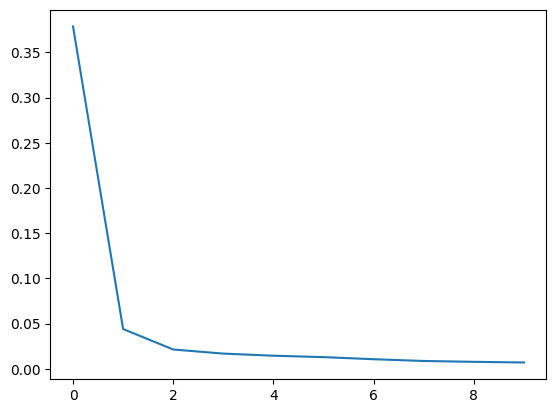

In [50]:
plt.plot(model.explained_variance_ratio_[:10]);

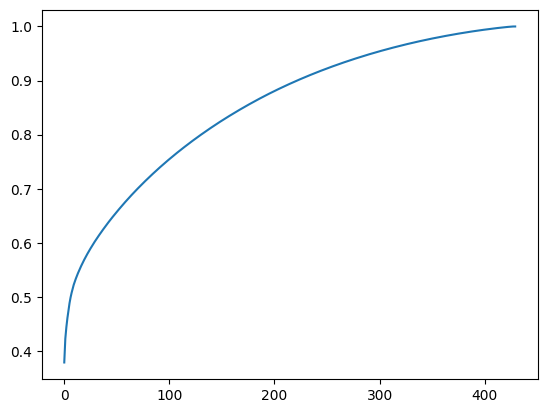

In [53]:
# Questo plot è la somma cumulativa del rapporto di varianze
cumulative_variance = np.cumsum(model.explained_variance_ratio_)
plt.plot(cumulative_variance);

### Plot della prima PCA vs S&P

Quello che facciamo adesso è confrontare la prima componente (quella più influente) con l'indice S&P

ATTENZIONE: quando facciamo la PCA, può succedere una cosa: potremmo avere come autovalore k oppure -k. Essi sono equivalenti. Se notiamo che la componente è negativa, dobbiamo "ribaltarla"

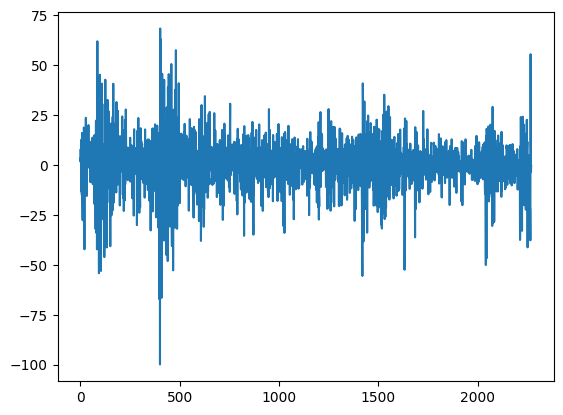

In [87]:
# plottiamo la prima componente
plt.plot(Z[:,0])

In [88]:
z_df = pd.DataFrame(index = returns.index, data = Z[:,0], columns=["PC1"])

In [89]:
z_df.head()

,PC1
Date,
2010-01-05,3.082268
2010-01-06,1.658736
2010-01-07,7.838046
2010-01-08,3.300012
2010-01-11,3.664966


In [90]:
spy = pd.read_csv("SPY.csv", index_col="Date", parse_dates=True)

In [91]:
spy_returns = np.log(spy["Close"]).diff().dropna()

<Axes: xlabel='Date'>

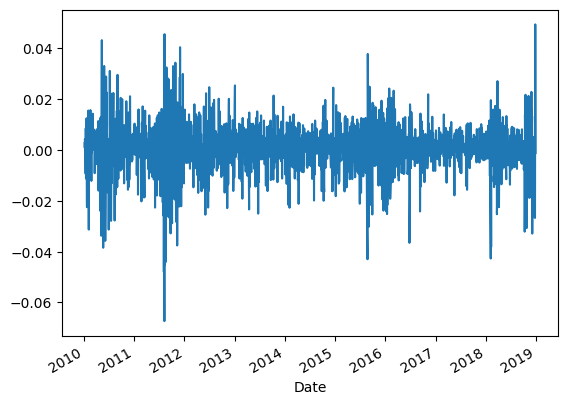

In [92]:
spy_returns.plot()

In [93]:
joined = z_df.join(spy_returns)
joined.columns = ["PC1", "SPY"]

In [94]:
joined.head()

,PC1,SPY
Date,,
2010-01-05,3.082268,0.002644
2010-01-06,1.658736,0.000704
2010-01-07,7.838046,0.004212
2010-01-08,3.300012,0.003322
2010-01-11,3.664966,0.001396


In [95]:
scaler2 = StandardScaler()
joined[joined.columns] = scaler2.fit_transform(joined)

<Axes: xlabel='Date'>

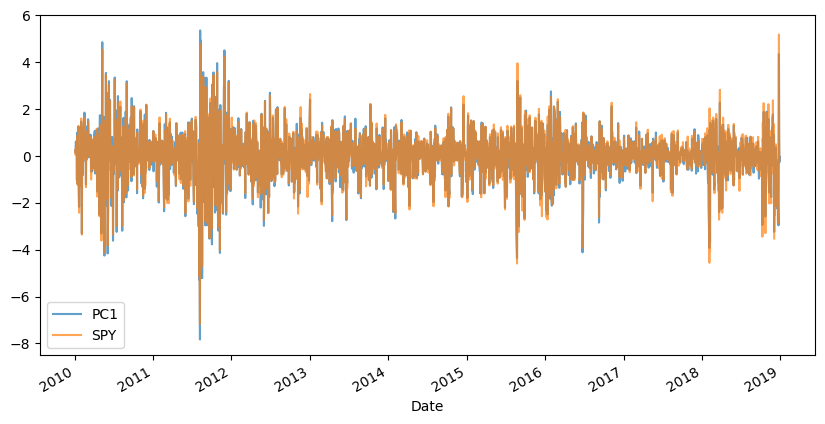

In [102]:
# La prima componente principale matcha totalmente S&P. Ha senso, dato che abbiamo preso proprio gli stocks di S&P
# La prima componente è proprio il mercato, infatti lo matcha bene.
joined.plot(figsize=(10, 5), alpha=0.7)